In [1]:
# usual imports 
import numpy as np
import matplotlib.pyplot as plt

#import tensorflow 
import tensorflow as tf
%matplotlib inline

In [2]:
# You can avoid the long names by using
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

In [3]:
#check if the correct version of tensorflow is used
tf.__version__

'1.14.0'

In [4]:
! pip install --upgrade tensorflow

     |████████████████████████████████| 102.7MB 78kB/s  eta 0:00:01    |████████▏                       | 26.4MB 447kB/s eta 0:02:51     |██████████                      | 31.8MB 447kB/s eta 0:02:39     |████████████████                | 51.4MB 765kB/s eta 0:01:08     |████████████████████▌           | 65.6MB 384kB/s eta 0:01:37     |████████████████████▊           | 66.3MB 384kB/s eta 0:01:35     |█████████████████████████▎      | 81.2MB 593kB/s eta 0:00:37     |███████████████████████████▍    | 88.1MB 331kB/s eta 0:00:45     |███████████████████████████▌    | 88.3MB 331kB/s eta 0:00:44
     |████████████████████████████████| 450kB 8.9MB/s eta 0:00:01
     |████████████████████████████████| 71kB 14.3MB/s eta 0:00:01
     |████████████████████████████████| 3.8MB 11.3MB/s eta 0:00:01
     |████████████████████████████████| 81kB 17.2MB/s eta 0:00:01
     |████████████████████████████████| 133kB 23.0MB/s eta 0:00:01
     |████████████████████████████████| 153kB 22.7MB/s eta 0:00:01
     |

  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=bf4c22c665e1fbc780153244af17fcda1e89206f0e20411d0a425dc9b92d7ef0
  Stored in directory: /Users/cousins/Library/Caches/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built opt-einsum gast
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.23.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.14.0
    Uninstalling tensorflow-estimator-1.14.0:
      Successfully uninstalled tensorflow-estimator-1.14.0
  Found existing installation: tensorboard 1.14.0
    Uninstalling tensorboard-1.14.0:
      Successfully uninstalled tensorboard-1.14.0
  Found existing installation: gast 0.3.1
    Uninstalling gast-0.3.1:
      Successfully uninstalled gast-0.3.1
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


In [5]:
#check if the correct version of tensorflow is used
tf.__version__

'1.14.0'

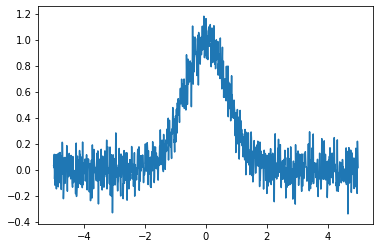

In [4]:
# generate data 

x = np.linspace(-5,5,1000)
y_real = np.exp( - (x**2)) + np.random.normal(loc=0, scale=0.1, size=x.shape)
plt.plot(x,y_real)

In [5]:
#reset the model 

model = models.Sequential()

# hidden layer (and output layer), one neuron 
model.add(layers.Dense(1, activation='sigmoid', input_shape=(1,)))

weights = model.get_weights()
# set the weights by hand as before
weights[0][0]=1       # weight 
weights[1][0]=-0.4    # bias 

model.set_weights(weights)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
# check if the network is what we expected
# Summary 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


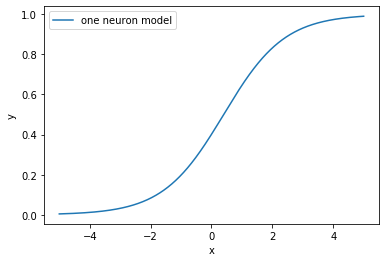

In [7]:
# predict 
y_oneneuron = model.predict(x)

# plot 
plt.plot(x,y_oneneuron, label='one neuron model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [8]:
#reset the model 
model = models.Sequential()

# hiddeb layer with 2 nodes 
model.add(layers.Dense(2, activation='sigmoid', input_shape=(1,)))


# output layer, one neuron 
model.add(layers.Dense(1,  activation='linear'))

#Weights 
weights = model.get_weights()
# hidden layer
weights[0][0]=np.array([ 1.5,-2.4]) #weights 
weights[1]=np.array([-0.4,2.0]) # biases
# output layer 
weights[2]=np.array([[3],[3]]) # weights
weights[3] = np.array([-3])    # bias

model.set_weights(weights)

In [9]:
# Again check the network to make sure is what we expeected 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 4         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


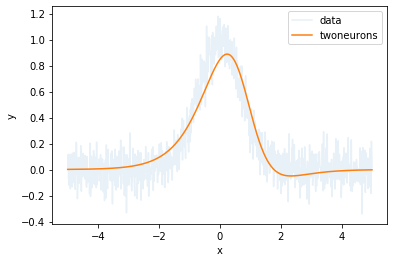

In [10]:
y_twoneurons = model.predict(x)

plt.plot(x, y_real, alpha=0.1, label='data')
plt.plot(x,y_twoneurons, label='twoneurons')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [11]:
#reset the model 
model_tf = models.Sequential()

# hiddeb layer with 2 nodes 
model_tf.add(layers.Dense(2, activation='sigmoid', input_shape=(1,)))


# output layer, one neuron 
model_tf.add(layers.Dense(1,  activation='linear'))

In [12]:
model_tf.compile(loss='MSE')
history = model_tf.fit(x,y_real, epochs=4, batch_size=32, verbose=0)

TypeError: compile() missing 1 required positional argument: 'optimizer'

In [ ]:
y_tf = model_tf.predict(x)

In [ ]:
plt.plot(x, y_real, alpha=0.1, label='data')
plt.plot(x,y_twoneurons, label='twoneurons')
plt.plot(x,y_tf, label='tf')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()